In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
def load_fif_file(filename):
    eeg_data_raw = mne.io.read_raw_fif(filename, preload=True)
    return eeg_data_raw

In [3]:
rsEEG = load_fif_file(os.path.join(".", "filtered", "rsEEG_cleaned.fif"))

Opening raw data file ./filtered/rsEEG_cleaned.fif...
    Range : 0 ... 796979 =      0.000 ...   796.979 secs
Ready.
Reading 0 ... 796979  =      0.000 ...   796.979 secs...


/tmp/ipykernel_1526865/665747015.py:2: RuntimeWarning: This filename (./filtered/rsEEG_cleaned.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_data_raw = mne.io.read_raw_fif(filename, preload=True)


# rsEEG

## Statistical features
- Mean
- STD
- Peak amplitude

In [10]:
def mean_dict(eeg_data):
    data = eeg_data.get_data()
    ch_names = eeg_data.info['ch_names']
    avg_values = np.mean(data, axis=1)
    electrode_avg_dict = dict(zip(ch_names, avg_values))
    return electrode_avg_dict

def total_mean(mean_dict, electrodes=None):
    if electrodes is None:
        return np.mean(list(mean_dict.values()))
    else:
        return np.mean([mean_dict[electrode] for electrode in electrodes])
    
def std_dict(eeg_data):
    data = eeg_data.get_data()
    ch_names = eeg_data.info['ch_names']
    std_values = np.std(data, axis=1)
    electrode_std_dict = dict(zip(ch_names, std_values))
    return electrode_std_dict

def total_std(std_dict, electrodes=None):
    if electrodes is None:
        return np.mean(list(std_dict.values()))
    else:
        return np.mean([std_dict[electrode] for electrode in electrodes])
    
def peak_dict(eeg_data):
    data = eeg_data.get_data()
    ch_names = eeg_data.info['ch_names']
    peak_values = np.max(data, axis=1)
    electrode_peak_dict = dict(zip(ch_names, peak_values))
    return electrode_peak_dict

In [11]:
print("Mean dict: ", mean_dict(rsEEG))
print("Total mean: ", total_mean(mean_dict(rsEEG)))
print("STD dict: ", std_dict(rsEEG))
print("Total STD: ", total_std(std_dict(rsEEG)))

Mean dict:  {'Iz': 4.831828670577138e-08, 'O2': -6.646421034045082e-10, 'Oz': 9.140795743200649e-09, 'O1': 1.2106453890452147e-08, 'PO8': -7.934161395576976e-09, 'PO4': 1.631112682203614e-09, 'POz': 6.212085209610109e-09, 'PO3': 7.132910216785342e-09, 'PO7': 3.803914049573473e-08, 'P8': -5.7762166244323455e-09, 'P6': -2.1027338870667617e-10, 'P4': 2.2168934474389513e-09, 'P2': 3.4543956201998997e-09, 'Pz': 4.714824173704864e-09, 'P1': 3.0506203972573603e-09, 'P3': 9.685499756136242e-10, 'P5': -1.0719866155491315e-08, 'P7': -1.574047249170996e-08, 'TP10': -2.4765758802062324e-08, 'TP8': 7.894114080738126e-09, 'CP6': 3.783367930158253e-09, 'CP4': 2.6935303300814007e-09, 'CP2': 3.4114279417073752e-09, 'CPz': 2.398174178112117e-09, 'CP1': 4.632102804781356e-09, 'CP3': -3.039456224842869e-09, 'CP5': -1.3852444045635384e-08, 'TP7': -3.53601269957046e-08, 'TP9': 5.637405084991569e-09, 'T8': -8.722111192001002e-09, 'C6': 5.537081029104555e-09, 'C4': 3.6840965311977987e-09, 'C2': 2.545329665666

## Power spectrum

Effective window size : 2.048 (s)


/home/tomasgalle/miniconda3/envs/tms/lib/python3.12/site-packages/mne/viz/utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


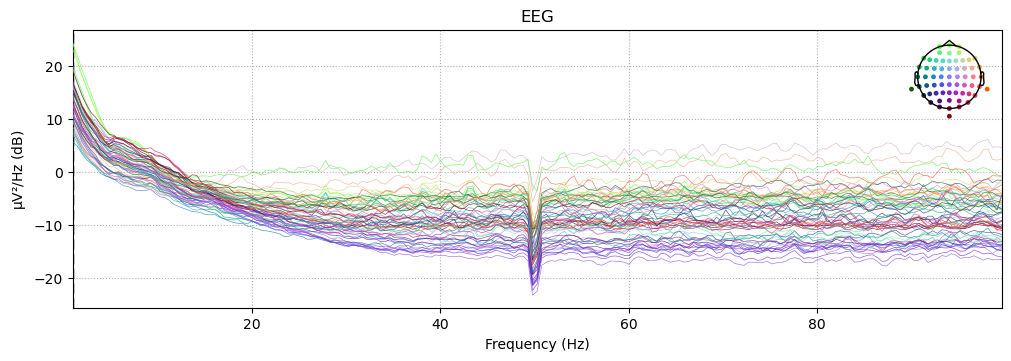

In [7]:
rsEEG.compute_psd(fmin=0.5, fmax=100, n_fft=2048, n_overlap=1024, verbose=True).plot()